In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.measure import regionprops

In [ ]:
img = plt.imread("../fullsize_segmentation/ISIC_0014931_segmentation.png")
img = plt.imread("../resized_data/example_segmentation_resized/ISIC_0015372_segmentation.png")
img = np.pad(img, 3)

In [ ]:
def perim(img):
    perimeter = 0
    for x1, x2 in zip(range(img.shape[0] - 1), range(3, img.shape[0] - 1)):
        for y1, y2 in zip(range(img.shape[1] - 1), range(3, img.shape[1] - 1)):
            view = img[x1:x2, y1:y2]
            if view[1, 1] and np.sum(view) < 9:
                perimeter += 1
    return perimeter

In [ ]:
%%timeit
perim(img)

1.88 s ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
perimeter = len(np.where(convolve(img, kernel) < 0, 1, 0)[0])

6.24 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
regionprops(img.astype(int))[0].perimeter

12.8 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
perim(img)
# about 1m 30s on fullsize img

1852

In [ ]:
regionprops(img.astype(int))[0].perimeter

1820.953318805774

1860


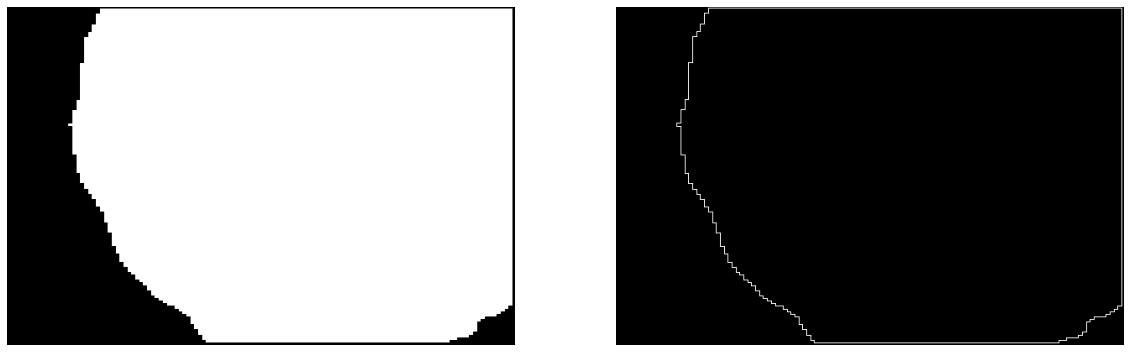

In [ ]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
perimeter = np.where(convolve(img, kernel) < 0, 1, 0)
print(np.sum(perimeter))
fig, axes = plt.subplots(1, 2, figsize=(20,10))
for ax, im in zip(axes, [img, perimeter]):
    ax.imshow(im, cmap="gray")
    ax.axis("off")

In [ ]:
from color_score import color_score
from color_features import color_features

In [ ]:
%%timeit
color_score("../resized_data/example_image_resized/ISIC_0001769.jpg", "../resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")

12.4 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
color_features("../resized_data/example_image_resized/ISIC_0001769.jpg", "../resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")

250 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>